In [16]:
import network
import activation
import loss

In [17]:
import numpy as np

In [18]:
data = np.random.rand(1000, 6)
l, r = np.hsplit(data, 2)
labels = np.cross(l, r, axis = 1)

In [19]:
crossnn = network.Network([6, 6, 6, 3, 3], [activation.Relu, activation.Relu, activation.Relu, activation.Relu], loss.MSE, 0.03)

In [20]:
losses = crossnn.train(data, labels)

In [21]:
import matplotlib.pyplot as plt

In [22]:
print(losses)

[3.73085059e+03 1.40565675e-02 6.32479960e-02 3.16201146e-01
 1.80440835e-01 2.72143766e-01 2.64999282e-01 1.86128644e-01
 2.45274424e-01 2.89540241e-01 1.15141823e-01 3.89269608e-02
 3.95657599e-01 2.09061698e-01 3.48938423e-01 3.26786428e-01
 8.11808141e-01 3.42058108e-01 8.29160537e-01 1.16867410e-01
 4.28023184e-01 1.59192938e-02 1.44624834e-01 8.44023965e-01
 7.42581621e-02 5.88519620e-01 1.23428927e-01 3.29078758e-01
 4.26733364e-01 2.02909051e-01 5.85821441e-01 1.09529631e+00
 2.00655198e-02 1.74615895e-01 7.72751384e-03 1.04730369e-01
 6.75909052e-01 1.27263740e-02 2.90866564e-01 6.06435017e-02
 9.02551589e-01 1.55387812e-01 1.31992364e-01 4.38999554e-02
 1.53395808e-01 1.49940064e-01 7.02804038e-01 4.60648358e-01
 1.14391924e-02 3.37555442e-01 2.63603029e-01 2.60011506e-01
 1.88211244e-02 2.16373634e-01 1.48245944e-01 1.45423532e-01
 2.13783583e-02 3.53687800e-03 4.47949194e-02 1.89230088e-01
 1.83132418e-01 1.18548483e-01 1.85361825e-02 3.10148877e-03
 2.60242303e-01 4.298597

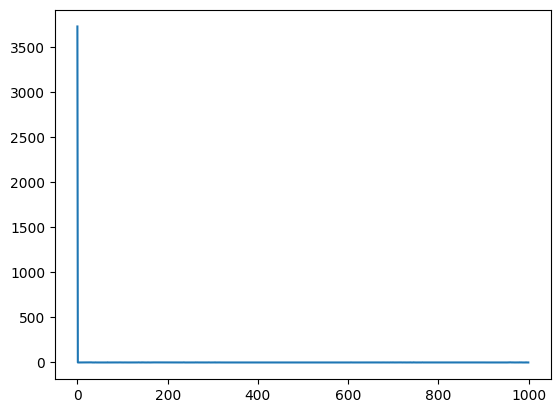

In [23]:
plt.plot(losses)
plt.show()

In [27]:
test_data = np.random.rand(30, 6)
test_l, test_r = np.hsplit(data, 2)
test_labels = np.cross(test_l, test_r, axis = 1)

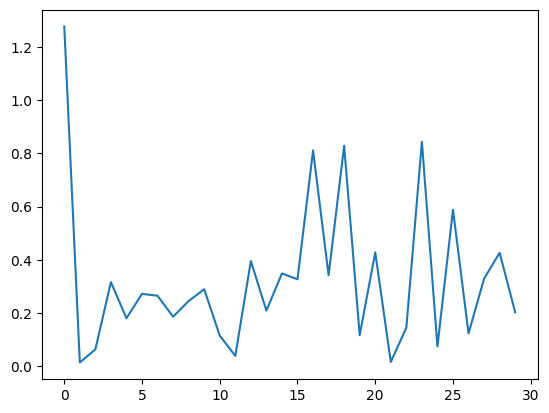

In [28]:
performance = crossnn.test(test_data, test_labels)
plt.plot(performance)
plt.show()

In [35]:
vecs = np.random.rand(1, 6)
lvec, rvec = np.hsplit(vecs, 2)

In [36]:
np.cross(lvec, rvec)

array([[ 0.21403993,  0.0411431 , -0.41475903]])

In [37]:
crossnn.predict(vecs)

array([[[0.],
        [0.],
        [0.]]])